🔹 Basic Reading

In [ ]:
import pandas as pd

# 1. Read full CSV
df = pd.read_csv("file.csv")

# 2. Read only first 10 rows
df = pd.read_csv("file.csv", nrows=10)

# 3. Assign custom column names
df = pd.read_csv("file.csv", names=["A", "B", "C", "D"])

# 4. Read without header row
df = pd.read_csv("file.csv", header=None,skiprows=1)

# 5. Display top 5 and bottom 5 rows
print(df.head())
print(df.tail())


🔹 Skip/Select Rows 

In [ ]:
# 6. Skip first 2 rows
df = pd.read_csv("file.csv", skiprows=2)

# 7. Skip every alternate row
df = pd.read_csv("file.csv", skiprows=lambda x: x % 2 != 0)

# 8. Start from 3rd data row (skip header + 2 rows)
df = pd.read_csv("file.csv", skiprows=[1, 2])

# 9. Skip rows 1, 5, and 10 only
df = pd.read_csv("file.csv", skiprows=[1, 5, 10])

# 10. Read rows 5–15
df = pd.read_csv("file.csv", skiprows=range(1, 5), nrows=11)


🔹 Column Filtering

In [ ]:
# 11. Read specific columns by index
df = pd.read_csv("file.csv", usecols=[0, 2, 4])

# 12. Read specific columns by name
df = pd.read_csv("file.csv", usecols=["Email", "Purchase Price"])

# 13. Rename selected columns while reading
df = pd.read_csv("file.csv", usecols=["Email", "Purchase Price"])
df.rename(columns={"Email": "User_Email", "Purchase Price": "Price"}, inplace=True)

# 14. Drop unnecessary columns
cols_to_keep = ["Name", "Country"]
df = pd.read_csv("file.csv", usecols=cols_to_keep)

# 15. Reorder columns
df = pd.read_csv("file.csv")
df = df[["Country", "Email", "Name", "Purchase Price"]]


🔹 Delimiters and Quotes

In [ ]:
# 16. ; as delimiter
df = pd.read_csv("file.csv", sep=';')

# 17. Tab-delimited
df = pd.read_csv("file.csv", sep='\t')

# 18. Pipe-delimited
df = pd.read_csv("file.csv", sep='|')

# 19. Handle quoted strings
df = pd.read_csv("file.csv", quotechar='"')

# 20. Fix mixed delimiters (advanced handling with regex or preprocessing required)
# Example: replace | with , then read
with open("file.csv", "r") as f:
    lines = [line.replace("|", ",") for line in f]
with open("fixed_file.csv", "w") as f:
    f.writelines(lines)
df = pd.read_csv("fixed_file.csv")


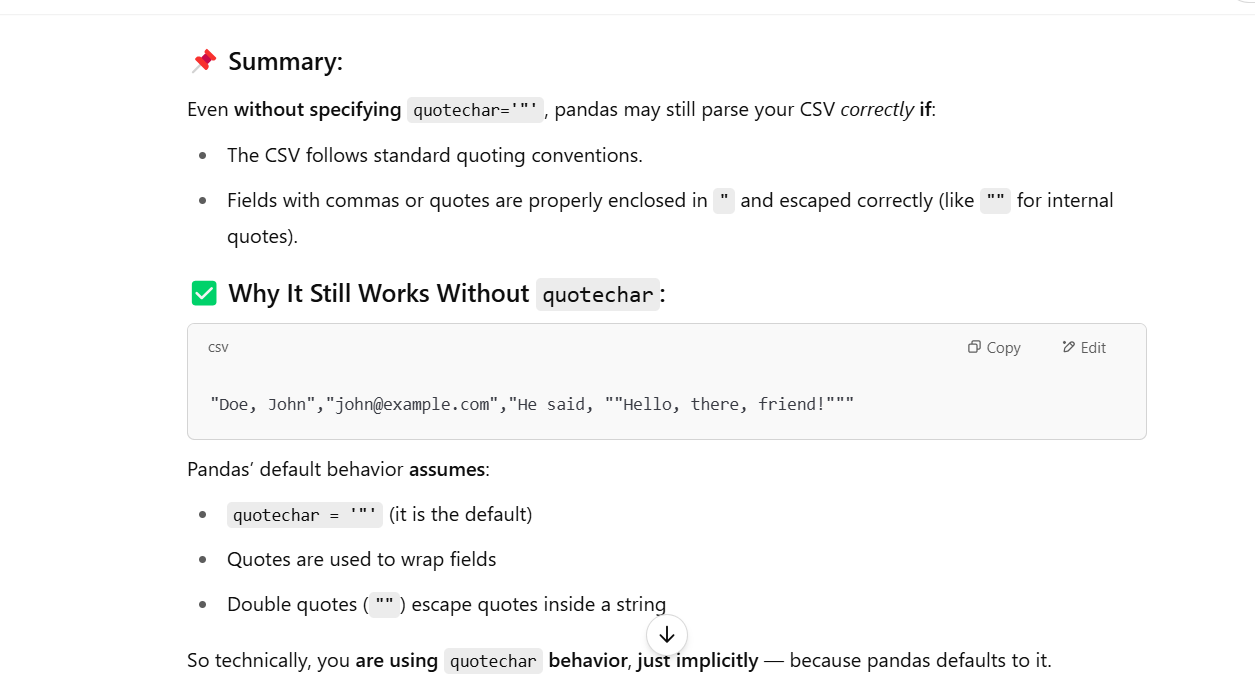

🔹 Encodings and Errors

In [ ]:
# 21. latin-1 encoding
df = pd.read_csv("file.csv", encoding='latin-1')

# 22. utf-16 encoding
df = pd.read_csv("file.csv", encoding='utf-16')

# 23. Skip corrupted rows
df = pd.read_csv("file.csv", on_bad_lines='skip')

# 24. No headers
df = pd.read_csv("file.csv", header=None)


#### "Safe File Reader with Encoding Detection for CSV, Excel, and JSON Files"

In [ ]:
import chardet
import pandas as pd

def detect_encoding(file_path):
    """
    Detect the encoding of a file using chardet.
    Returns the encoding of the file.
    """
    with open(file_path, "rb") as f:
        result = chardet.detect(f.read(100000))  # Read first 100,000 bytes for detection
        encoding = result['encoding']
        confidence = result['confidence']
        print(f"Detected Encoding for {file_path}: {encoding} (Confidence: {confidence * 100:.2f}%)")
        return encoding

def read_file_with_encoding(file_path):
    """
    Detect file encoding and read it safely with pandas (supports CSV, Excel, JSON, etc.).
    """
    encoding = detect_encoding(file_path)
    
    # For CSV files
    if file_path.endswith('.csv'):
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print("✅ CSV file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read CSV file: {e}")
            return None

    # For Excel files (.xls, .xlsx)
    elif file_path.endswith(('.xls', '.xlsx')):
        try:
            df = pd.read_excel(file_path, encoding=encoding)
            print("✅ Excel file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read Excel file: {e}")
            return None
    
    # For JSON files
    elif file_path.endswith('.json'):
        try:
            df = pd.read_json(file_path, encoding=encoding)
            print("✅ JSON file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read JSON file: {e}")
            return None

    # Add other file type handling here if needed
    else:
        print("❌ Unsupported file type.")
        return None

# Usage
file_path = "your_file.json"  # Change this to your file path
df = read_file_with_encoding(file_path)
if df is not None:
    print(df.head())  # Display first 5 rows of the dataframe


# What is chardet?

`chardet` is a Python library used to detect the encoding of a given byte string or file. It is particularly useful when working with text data in various file formats (e.g., CSV, JSON, TXT, etc.) where the encoding may not be known beforehand. By using `chardet`, we can automatically determine the correct encoding, which allows us to read and process files accurately.

---

# Why Use chardet?

In data processing, we often deal with text data from different sources or in various languages. The encoding of the file is not always provided, and incorrect encoding can lead to corrupt or unreadable data. `chardet` helps in automatically detecting the encoding of a file, making it easier to read and process the content in the correct format.

---

# How Does chardet Work?

`chardet` uses statistical methods to analyze byte sequences in a file and estimate the most likely encoding. The library applies a set of heuristics (rules based on byte patterns) to detect encodings. It compares the byte sequences to known encoding patterns and returns the most probable encoding, along with a confidence level indicating how certain it is of its detection.

---

# Output from chardet

When you use `chardet.detect()`, it returns a dictionary containing the following information:

- **encoding**: The most likely encoding detected (e.g., `utf-8`, `ISO-8859-1`, etc.).
- **confidence**: A float value between 0 and 1 that indicates the confidence level of the result. A value closer to 1 means higher confidence.
- **language** (optional): The language detected based on the encoding, though this may not always be available.

---

# How chardet is Useful

- **Detect Encoding of Unknown Files**: Files that come from unknown or unspecified sources often have unknown encodings. `chardet` can automatically detect the encoding, so you don’t need to worry about choosing the wrong one.
  
- **Handling Mixed Encodings**: If you have a set of files from various sources, `chardet` can detect each file’s encoding, allowing you to handle them accordingly.
  
- **Read Files Safely**: By using the detected encoding, you can safely read files without errors like `UnicodeDecodeError`.
  
- **Clean Corrupted Files**: Sometimes files are corrupted due to improper encoding. `chardet` can help identify the correct encoding, and you can fix the file by converting it to a consistent encoding (e.g., UTF-8).

---

# Limitations of chardet

- **Accuracy**: While `chardet` is quite accurate, it is not always 100% correct. It works based on statistical probabilities, which means there might be a chance it detects the wrong encoding.
  
- **Edge Cases**: For very rare encodings or files with inconsistent byte patterns, `chardet` might misidentify the encoding.
  
- **Confidence Level**: The confidence level is not always 1.0 (100%), so it's important to consider this when using the detected encoding.

---

# Best Practices for Using chardet

1. **Check the Confidence**: Always pay attention to the confidence level. A low confidence means the result might not be accurate.
  
2. **Use Known Encoding**: If you know the encoding in advance (e.g., UTF-8), it is always better to specify it directly when opening the file to avoid ambiguity.

3. **Test the Encoding**: Even if `chardet` suggests a high-confidence encoding, it is a good idea to test it with a small portion of the file to ensure it is read correctly.

---

# Conclusion

`chardet` is an incredibly useful tool for detecting the encoding of files, especially when working with data from different sources. By using `chardet`, you can automatically determine the correct encoding, ensuring that your files are processed without errors related to encoding mismatches. However, it’s important to remember that `chardet` is based on probabilities, and while it works well in most cases, it’s always good practice to verify the results, especially for important data.


🔹 Large File Handling

In [ ]:
# 25. Read in chunks
chunks = pd.read_csv("file.csv", chunksize=100)
for chunk in chunks:
    print(chunk.head())

# 26. Read first 5000 rows and save
df = pd.read_csv("file.csv", nrows=5000)
df.to_csv("first_5000.csv", index=False)

# 27. Iterate through chunks and calculate average
total = 0
count = 0
for chunk in pd.read_csv("file.csv", chunksize=1000):
    total += chunk["Purchase Price"].sum()
    count += chunk["Purchase Price"].count()
average = total / count
print(f"Average Purchase Price: {average}")


🔹 Writing File

In [ ]:
# 28. Write selected columns
df = pd.read_csv("file.csv", usecols=["Email", "Country"])
df.to_csv("filtered.csv", index=False)

# 29. Filter rows by country and export
df = pd.read_csv("file.csv")
df[df["Country"] == "India"].to_csv("only_india.csv", index=False)

# 30. Drop rows with missing values and save
df = pd.read_csv("file.csv")
df.dropna().to_csv("cleaned_data.csv", index=False)
